## Forward Euler Method
Now let's derive a method for finding the approximations $x_k$.  We have the equation $x'(t) = f(t, x)$.  In general, we will already know the formula for $f$, but even if we knew $x(t_k)$ exactly for all of our times, this equation wouldn't help us because we still wouldn't know $x'(t)$.  To get around this problem, we can try to approximate $x'(t)$ using some of our $x$ values.  For example, let's use the first-order forward difference scheme that we derived a few weeks ago to approximate $x'(t)$.  That is, we will write 

$x'(t) \approx \frac{x(t + \Delta t) - x(t)}{\Delta t}$.

This approximation is valid for any time, so in particular it is valid at time $t = t_0$.  We therefore have 

$x'(t_0) \approx \frac{x(t_0 + \Delta t) - x(t_0)}{\Delta t} = \frac{x(t_1) - x_0}{\Delta t},$

(since $t_0 + \Delta t = t_1$). We can therefore (approximately) rewrite our differential equation as 

$\frac{x(t_1) - x_0}{\Delta t} \approx f(t_0, x(t_0)) = f(t_0, x_0)$.  

If we rearrange this, we get 

$x(t_1) \approx x_0 + \Delta t f(t_0, x_0)$.  

Of course, this isn't the actual $x(t_1)$, but if $\Delta t$ is small enough then it should be a good approximation, so we will take this formula as our definition for $x_1$.  That is, 

$x_1 = x_0 + \Delta t f(t_0, x_0)$.  

Notice that we know everything on the right hand side of this equation.  We are given $x_0$, $t_0$, $f$ and $\Delta t$ at the start of the problem, so this formula gives us $x_1$.  We say that this is an *explicit* formula because it is already solved for $x_1$ in terms of things we already know.  

We can do exactly the same thing at time $t = t_1$.  Our difference scheme is then 

$x'(t_1) \approx \frac{x(t_1 + \Delta t) - x(t_1)}{\Delta t} = \frac{x(t_2) - x(t_1)}{\Delta t}$.  

Plugging this into our differential equation at time $t_1$ and rearranging, we get 

$x(t_2) \approx x(t_1) + \Delta t f(t_1, x(t_1))$.  

We don't know $x(t_1)$ or $x(t_2)$, but we do already have an approximation to $x(t_1)$, so we have 

$x(t_2) \approx x_1 + \Delta t f(t_1, x_1)$.  

As before, we will just take this as the definition for $x_2$, so we have 

$x_2 = x_1 + \Delta t f(t_1, x_1)$.  

Once again, this is an explicit equation for $x_2$.  We just found $x_1$ in the last step, and everything else in this formula was given at the beginning of the problem.  

We can keep repeating this process for as long as we want.  In general, if we have already found all the $x$ values up to $x_k$, then we get the formula 

$x_{k+1} = x_k + \Delta t f(t_k, x_k)$.  

This method of approximation is called the *forward Euler method*, because we used a forward difference scheme to approximate $x'(t)$.  We say that the forward Euler method is a *time stepping method* because we find the approximation to $x$ at each time in turn.  That is, we find an approximation for $x(t_1)$, then an approximation for $x(t_2)$, then an approximation for $x(t_3)$, etc., and we never go back and find a new approximation for an earlier time.  The forward Euler method is also called *explicit* because at each step we have to solve an explicit equation for the next approximation.  

## Graphical representation of differential equations
It's going to be very helpful to visualize the numerical approximation methods we will use in this class (such as Forward Euler above). To do so, we need to think about visualizing differential equations. When we have 
$$ x'(t) = f(t, x)$$
this means that the derivative of the function $x(t)$ is defined at every point in the $(t,x)$ plane by the function $f(t,x)$. In other words, if we plug in some value of $x$ and $t$, we get a derivative, or a slope. In order to plot it, we plug in a bunch of $x$ and $t$ values, and we get the slope for all of the $t$ and $x$ values. 

Let's think back to the example that I said was really important: $x'(t) = \alpha x$. To be specific, let's choose $\alpha = 2$ so we have $x'(t) = 2 x$. Then let's just choose a random point in the $(t,x)$ plane, e.g., $t = 1,~x=3$. We have that $x'(1) = 2\times 3 = 6$. We can visualize this using a *quiver plot.*

<IPython.core.display.Javascript object>


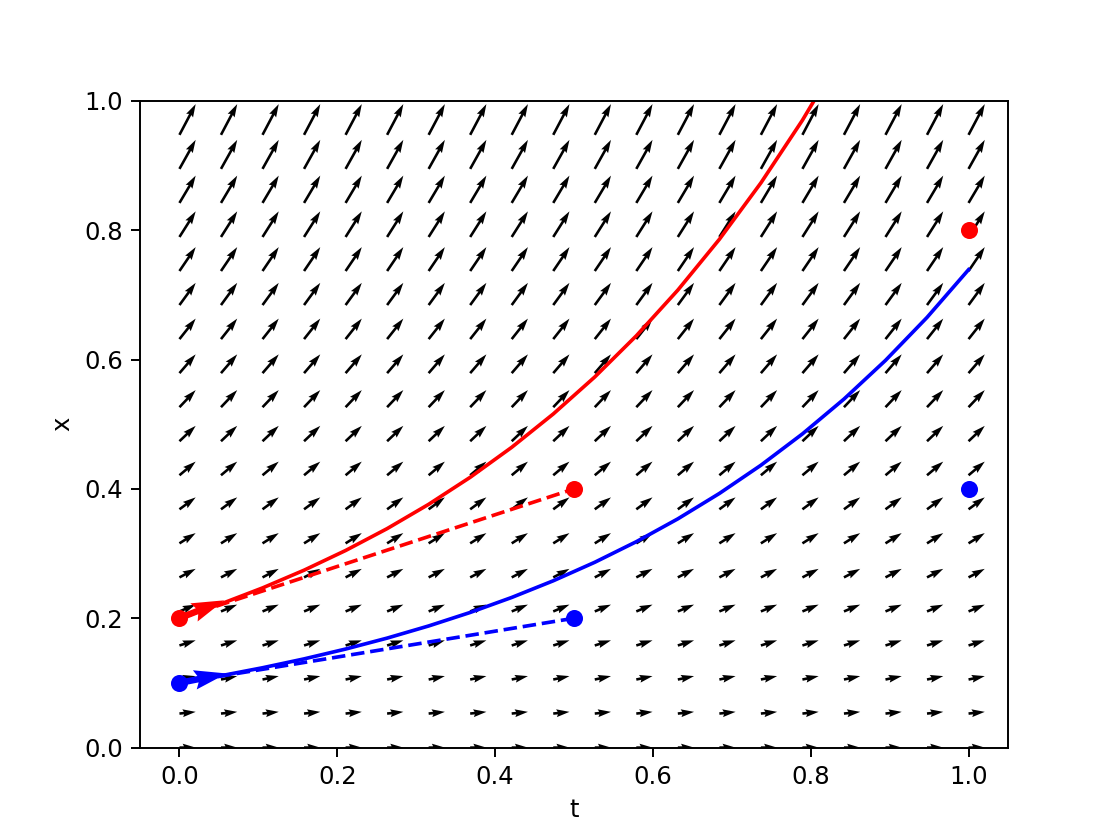

Text(0, 0.5, 'x')

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
# Create a numpy array of 20 linearly spaced t points between 0 and 1 
#       and 20 linearly spaced x points between 0 and 1
t = np.linspace(0, 1, 20) # Solve up to t=1
x = np.linspace(0, 1, 20) # Plot for x between 0 and 1

# To do this, we need a meshgrid... You create it below!
T, X = np.meshgrid(t, x)

# Now that we have the meshgrid, we want to draw arrows in the (t,x) plane. 
# To do so we use plt.quiver. The syntax is plt.quiver(location_1, location_2, run, rise).
# In this case, location_1 = t, location_2 = x, then because the slope is 2x, the run is 1 and rise is 2x.
fig, ax = plt.subplots()
ax.quiver(T, X, np.ones(T.shape), 2*X)
ax.set_xlabel('t')
ax.set_ylabel('x')

So what does a solution look like? In order to visualize it we need to have an initial condition! Let's add an initial condition to the plot. Let's choose $x(0) = 0.2$. 

<IPython.core.display.Javascript object>


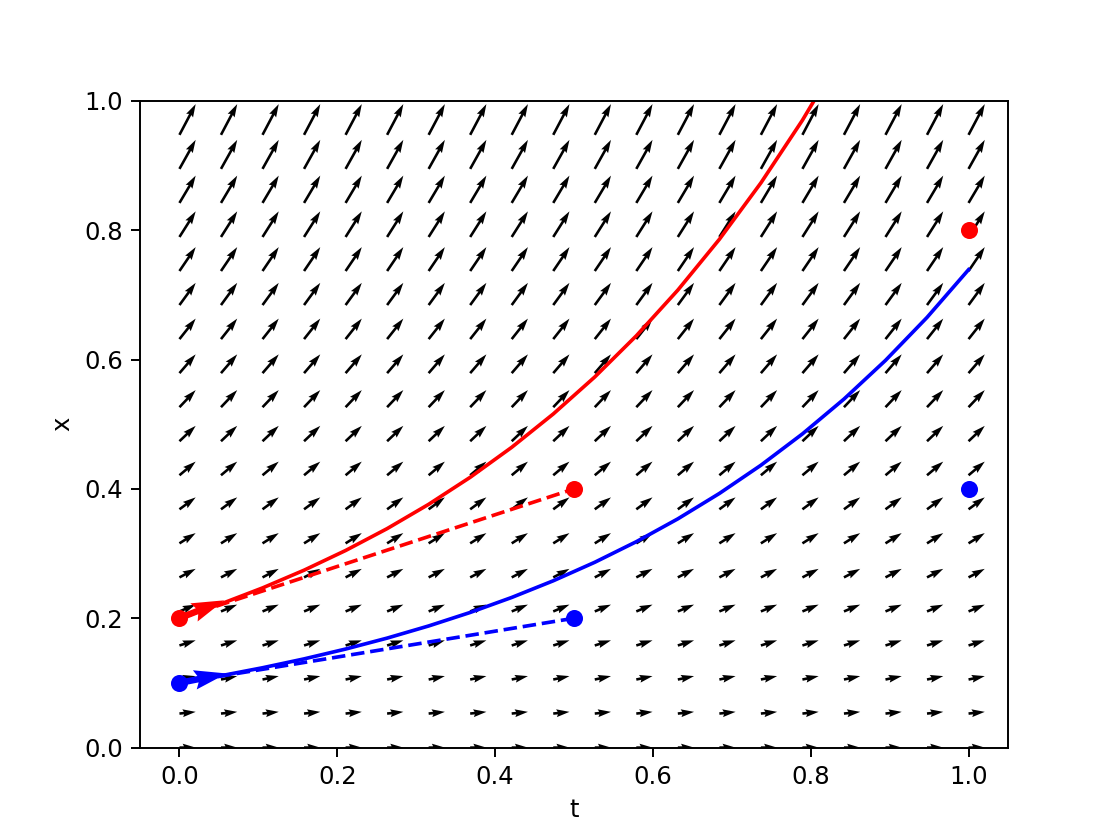

In [2]:
ax.plot(0, 0.2, 'ro')
fig

Then the solution is $x(t) = 0.2 e^{2t}$. We can also plot that below.

<IPython.core.display.Javascript object>


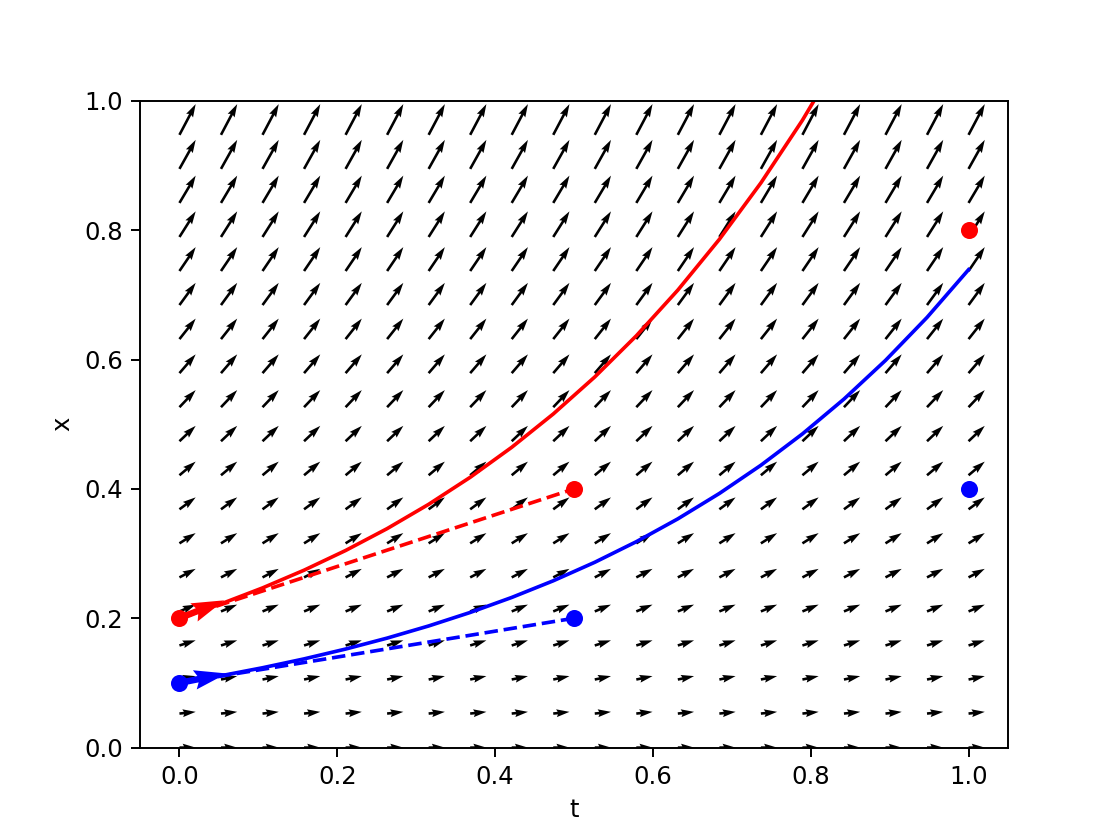

In [3]:
# You add a plot of the solution to the figure. Plot the solution in red.
ax.plot(t, 0.2*np.exp(2*t), 'r')
ax.set_ylim([0, 1])
fig

We can see that the solution is following the arrows, because the arrows tell us the slope of the tangent line at each point. If we had a different initial condition, like $x(0) = 0.1$, we would have a different solution curve.

<IPython.core.display.Javascript object>


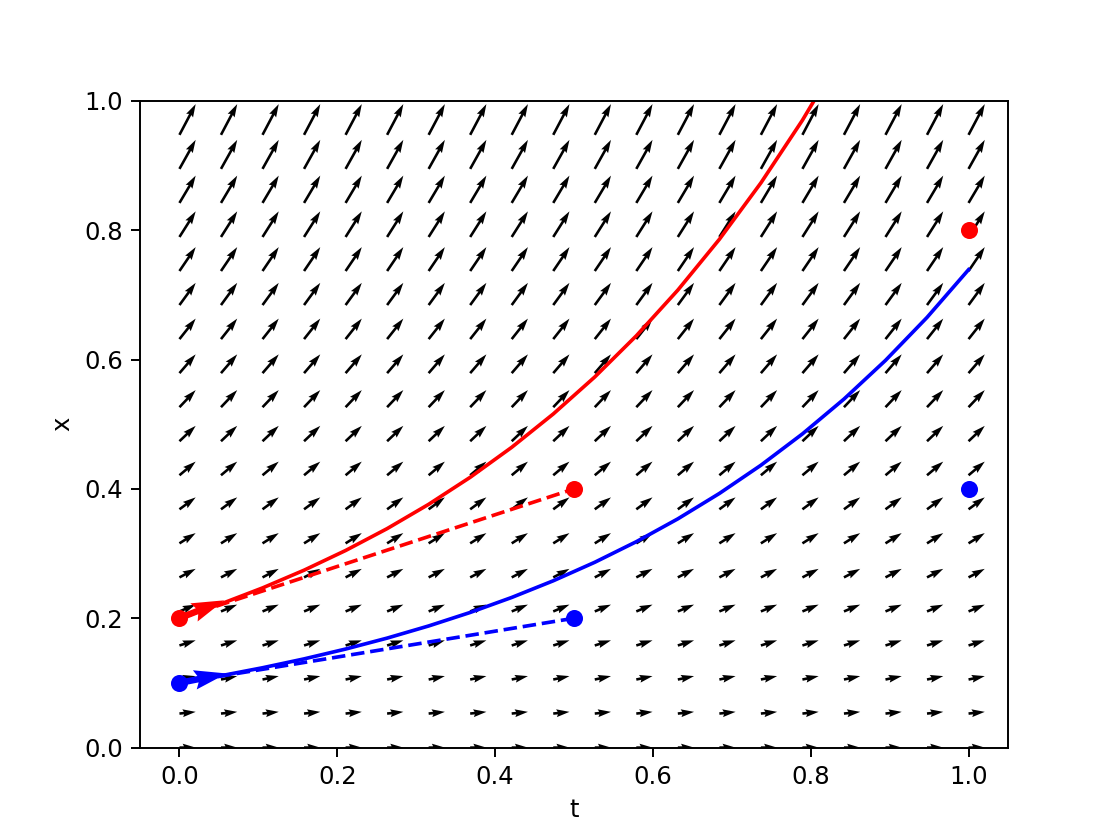

In [4]:
# Plot a dot at (t,x) = (0, 0.1) and the solution curve, both in blue
ax.plot(0, 0.1, 'bo')
ax.plot(t, 0.1*np.exp(2*t), 'b')
fig

If we choose $\Delta t = 0.5$, then one step of Forward Euler is to follow the slope of the tangent line at the initial condition, $t=0$, for a certain time ($\Delta t$). Let's visualize that below.

<IPython.core.display.Javascript object>


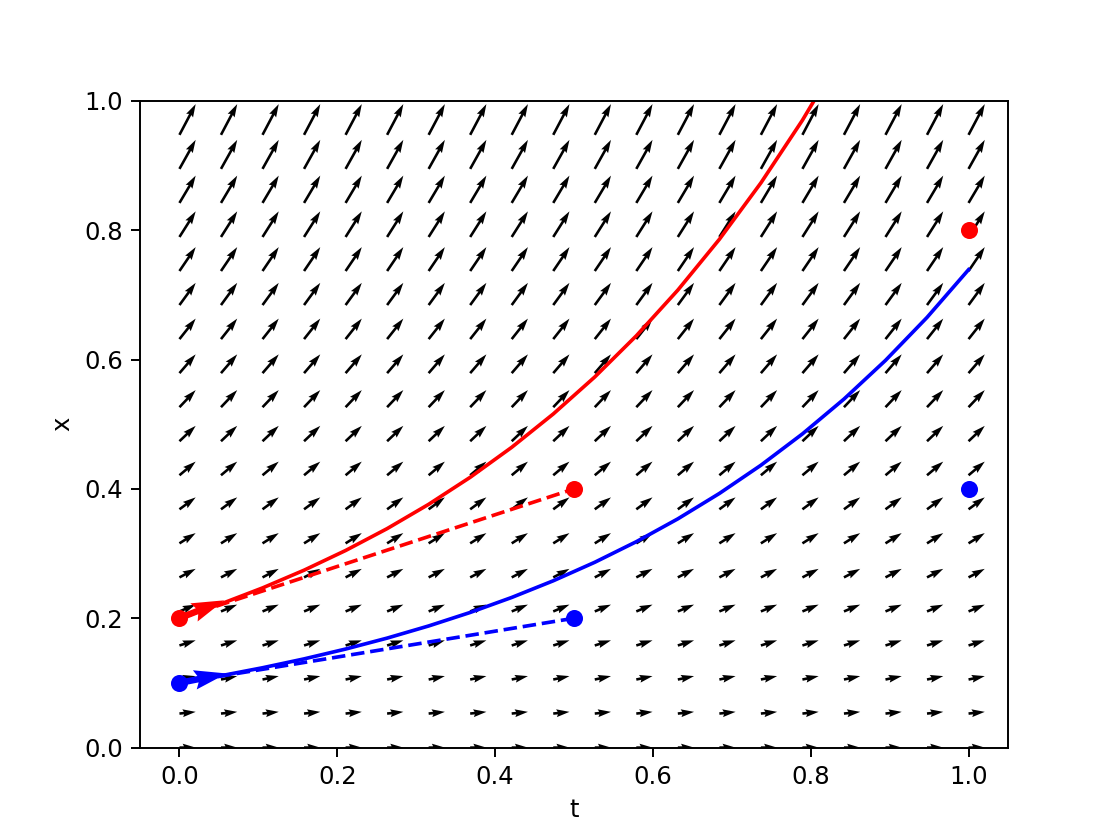

In [5]:
# Draw one quiver (arrow) starting at (t, x) = (0, 0.2) with slope given by f(0, 0.2). 
# Draw this quiver in red.
delta_t = 0.5
x_0 = 0.2
ax.quiver(0, x_0, 0.5, 2*delta_t*x_0, color = 'r') 
# Then draw the tangent line at this point
ax.plot([0, delta_t], [x_0, x_0 + 2*delta_t*x_0], 'r--') # Goes from point (t_0, x_0) = (0, 0.2) 
                                                 # to (t_1, x_1) = (0.3, 0.2 + 2*0.5*0.3), 
                                                 # from the Forward Euler formula

# Do the same thing for the blue curve.
x_0_b = 0.1
ax.quiver(0, x_0_b, delta_t, 2*x_0_b*delta_t, color = 'b')
ax.plot([0, delta_t], [x_0_b, x_0_b + 2*delta_t*x_0_b], 'b--') 

fig

Following this tangent line gives the next point, which we plot below.

<IPython.core.display.Javascript object>


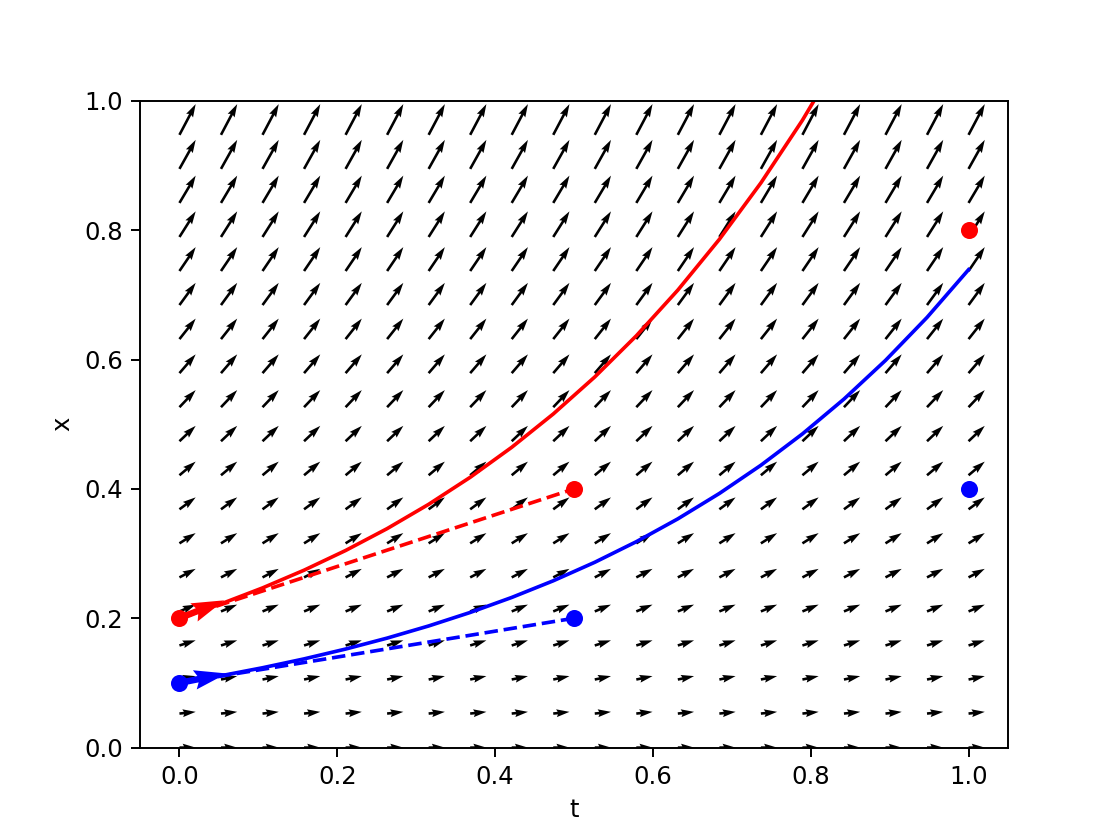

In [6]:
# First plot the x_1 point for the red curve
x_1 = x_0 + 2*delta_t*x_0
ax.plot(delta_t, x_1, 'ro')

# Then do the same for the red curve
x_1_b = x_0_b + 2*delta_t*x_0_b
ax.plot(delta_t, x_1_b, 'bo')
fig

The two dots we see at $t=0.5$ are the *approximate* values of $x(0.5)$ for the *two different initial conditions*. To get the next approximation, for $x(1)$, we apply the formula again. That is,
$$x(1) = x(0.5) + 0.5\times 2 \times x(0.5).$$
You can implement that below.

<IPython.core.display.Javascript object>


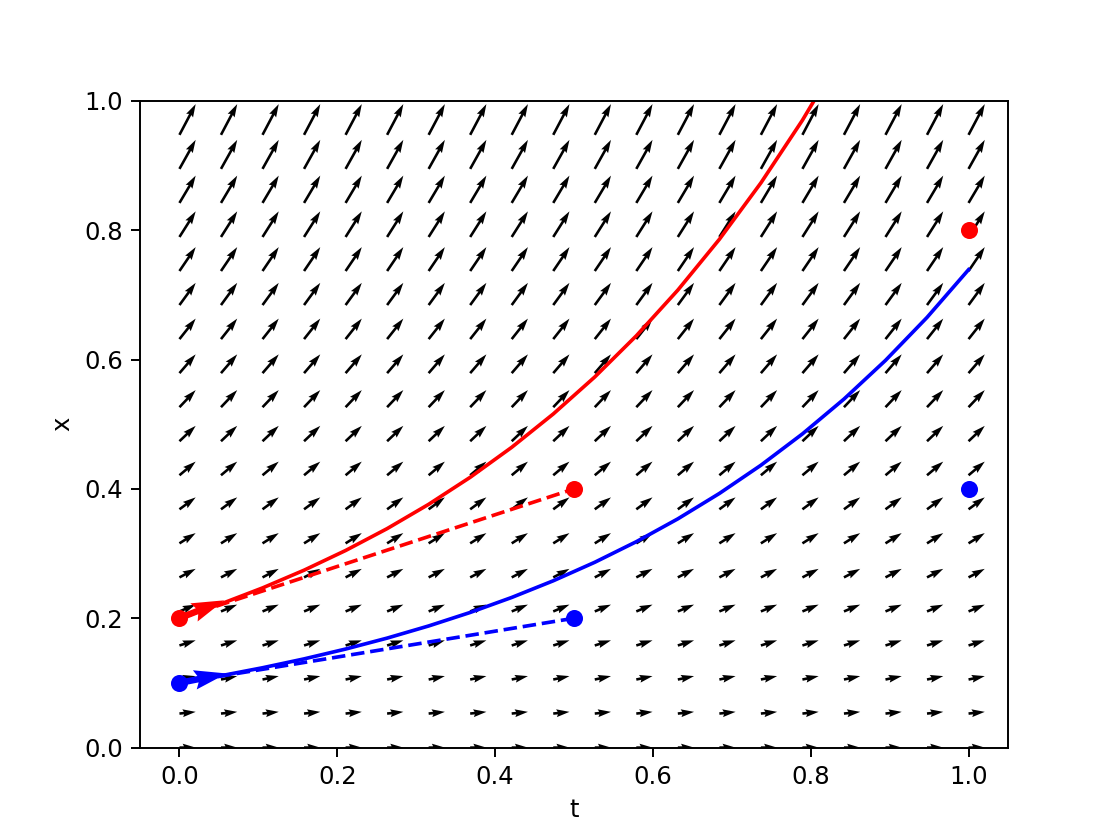

In [7]:
# First plot the x_2 point for the red curve
x_2 = x_1 + 2*delta_t*x_1
ax.plot(2*delta_t, x_2, 'ro')

# Then do the same for the blue curve
x_2_b = x_1_b + 2*delta_t*x_1_b
ax.plot(2*delta_t, x_2_b, 'bo')
fig

I think you can see where this is going, if we want to find the solution at all points in a given domain, you can use a loop! 

Below we'll find the solution of $$x'(t) = 2x, x(0) = 3$$ at all points from $0\leq t \leq 1$ with $\Delta t = 0.1$. 

In [8]:
# Define dt
dt = 0.1

# Define the t values at which we will get the solution, using delta t = 0.1
# call the values 'tspan'
tspan = np.arange(0, 1, 0.1)

# Define the ODE as an anonymous function.
# Call the anonymous function "ode"
ode = lambda z: 2*z

# We will use initial condition x_0 = 3. Define it below
x_0 = 3

# Now define an empty version of our solution, which we will call 'x'
x = np.zeros(len(tspan))

# Before we do the for loop, define the initial value of x, which is the x_0 value
x[0] = x_0

# Now do the for loop at each value of tspan
for k in range(len(tspan)-1): # Note that we do len(tspan)-1 because we use x[k+1]
    x[k+1] = x[k] + dt*(ode(x[k]))
    
print(x)
    

[ 3.          3.6         4.32        5.184       6.2208      7.46496
  8.957952   10.7495424  12.89945088 15.47934106]


Now we plot it

<IPython.core.display.Javascript object>


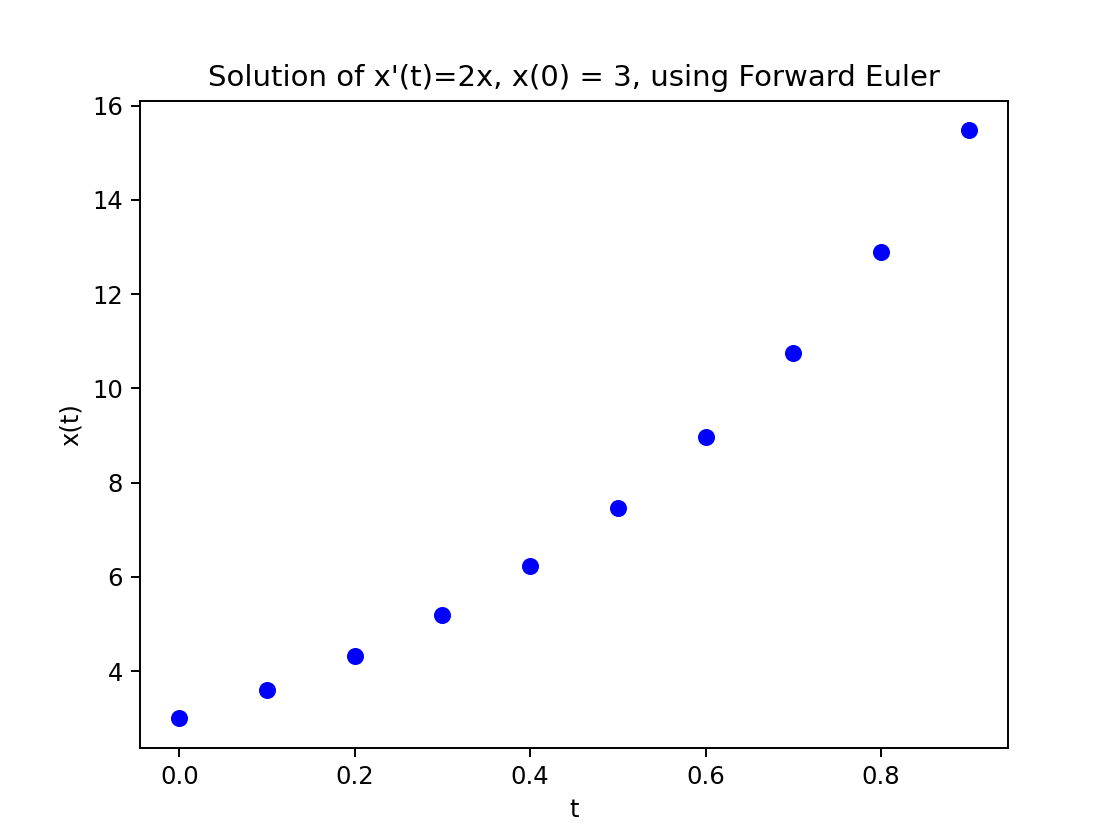

Text(0.5, 1.0, "Solution of x'(t)=2x, x(0) = 3, using Forward Euler")

In [9]:
plt.figure() # Create a new figure
plt.plot(tspan, x, 'bo')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("Solution of x'(t)=2x, x(0) = 3, using Forward Euler")

#### Another, more interesting example. 
Let's think about the initial-value problem (IVP)
$$ \frac{dy}{dt} = 5 \sin(y), \qquad y(0) = \frac{\pi}{4}.$$

We will:
- plot the vector field and the Forward-Euler solution 
- plot the true solution, $y(t) = 2 \arctan\left(e^{5t}\tan(\pi/8)\right)$
- calculate the error as $\Delta t$ changes.

<IPython.core.display.Javascript object>


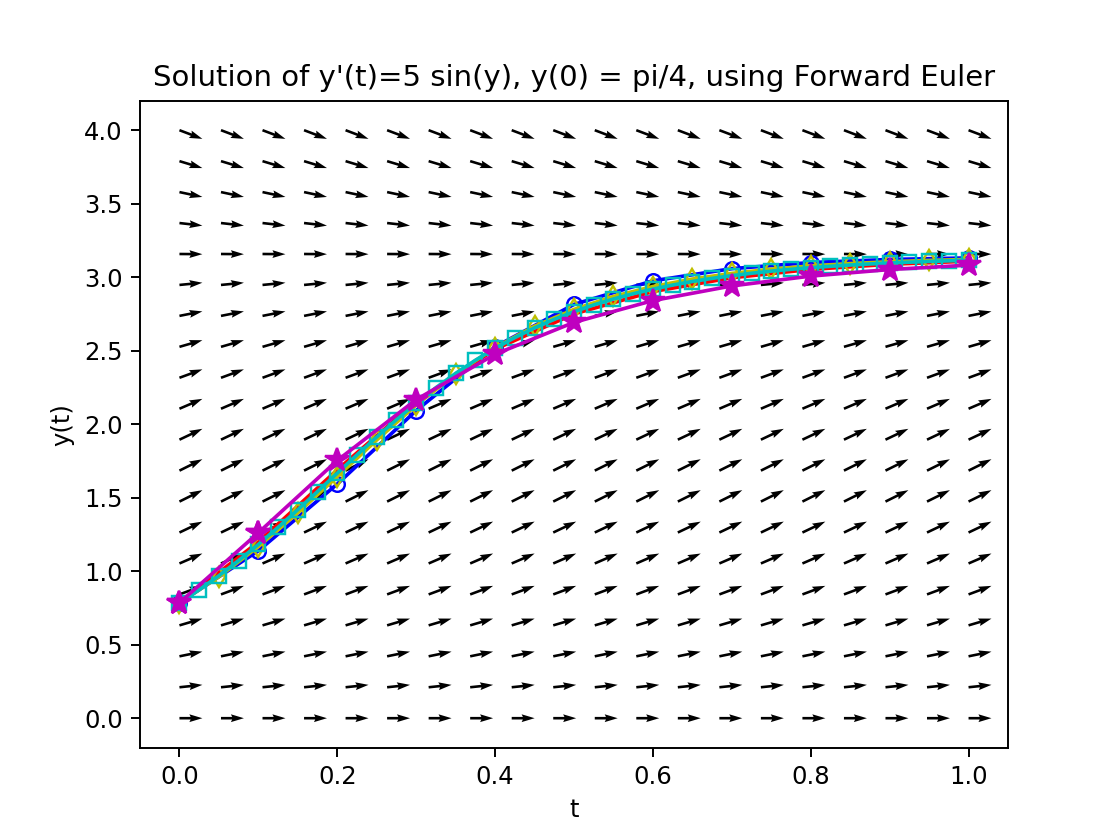

Text(0.5, 1.0, "Solution of y'(t)=5 sin(y), y(0) = pi/4, using Forward Euler")

In [10]:
fig2, ax2 = plt.subplots() # Create a new figure

## First draw the vector field
# Define tspan, from 0 to 1 with 20 points
tspan = np.linspace(0, 1, 20)
# Define yspan, from 0 to 4 with 20 points
yspan = np.linspace(0, 4, 20)
# Create the meshgrid, T, Y
T, Y = np.meshgrid(tspan, yspan)
# Plot the vector field. Now rise/run = 5 sin(y). 
# In order to make the quiver plot look correct, we need to multiply by dt. 
# You don't need to worry about this difference because you won't have to do this
# on your homework. But the rise here should be dt*5*sin(y)
dt = 0.1
ax2.quiver(T, Y, np.ones(T.shape), dt*5*np.sin(Y))

ax2.set_xlabel('t')
ax2.set_ylabel('y(t)')
ax2.set_title("Solution of y'(t)=5 sin(y), y(0) = pi/4, using Forward Euler")

Now we will add the numerically-approximated Forward Euler solution.

<IPython.core.display.Javascript object>


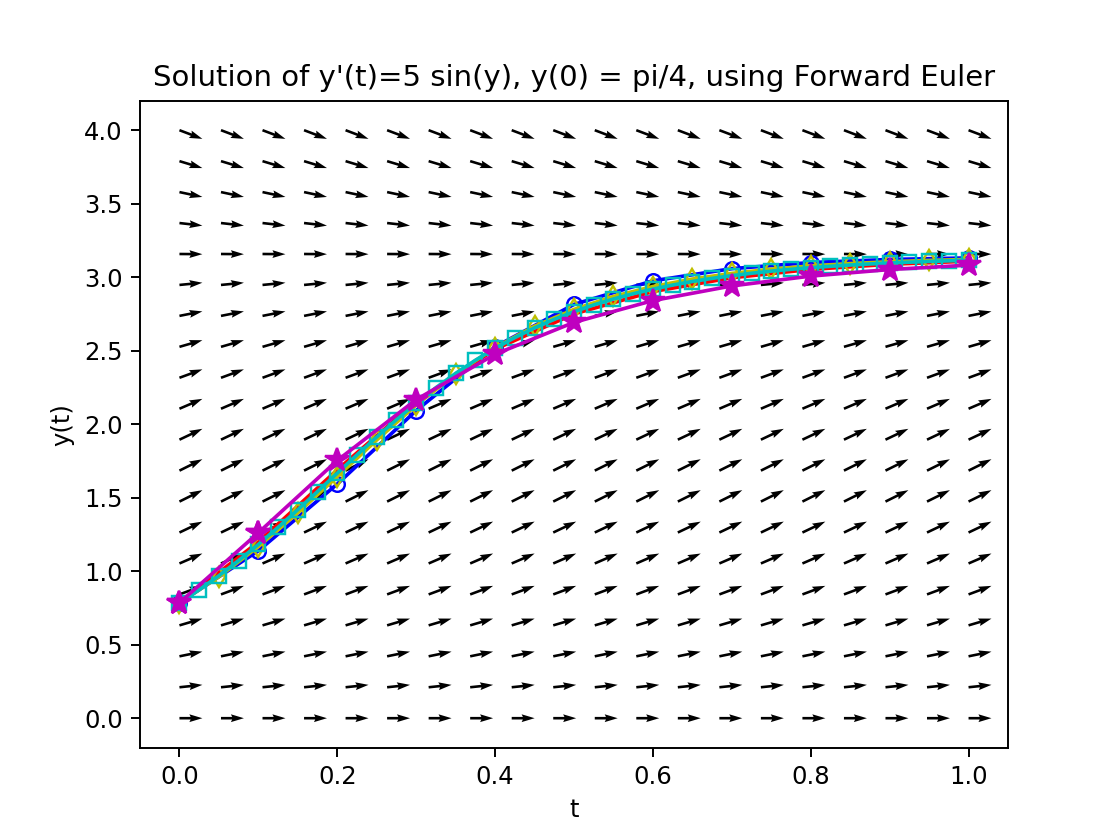

In [11]:
# First define the ODE, f, using an anonymous function
f = lambda y: 5*np.sin(y)

# Then set dt = 0.1
dt = 0.1

# We will solve for t between 0 and 1 with spacing dt, define t
t = np.arange(0, 1+dt, dt)

# Then predefine the array "y" which will hold our solution.
y = np.zeros(len(t))

# Then setup forward euler with the initial condition, y(0) = pi/4
y[0] = np.pi/4

# And calculate all of the other points in a for loop
for k in range(len(y)-1):
    y[k+1] = y[k] + dt*f(y[k])
    
# Then plot it using open blue circles with lines in between
ax2.plot(t, y, 'bo-', markerfacecolor='none')

# And show the figure
fig2

Let's compare this to the exact solution and calculate the error at the endpoint. 

Error at t=1.0, with dt = 0.1, is =  0.02207738035344864


<IPython.core.display.Javascript object>


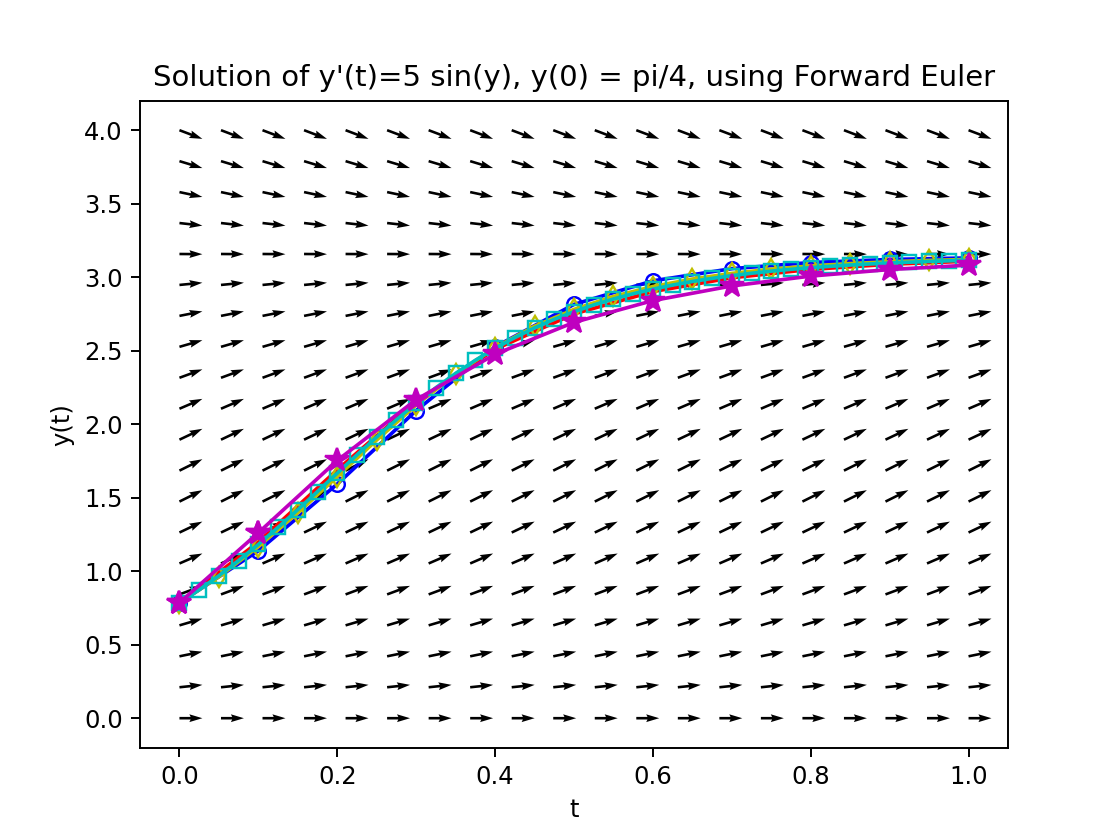

In [12]:
# Define the exact solution as an anonymous function
y_exact = lambda z: 2*np.arctan(np.exp(5*z)/(1+np.sqrt(2)))

# Now plot it in red.
ax2.plot(t, y_exact(t), 'r')

# Let's also calculate the error at the endpoint
# Calculate the error by computing |y_exact(1) - y(1)|, 
# where y is the Forward-Euler solution.
# Call the answer "error"
error = np.abs(y_exact(1) - y[-1])
print("Error at t=1.0, with dt = 0.1, is = ", error)

# And show the figure
fig2

We can see that there is some error. To see how the error changes, let's decrease dt and calculate the new solution.

Everything stays the same as we did above, except now dt changes.

Error at t=1.0, with dt = 0.05, is =  0.011877473966474206


<IPython.core.display.Javascript object>


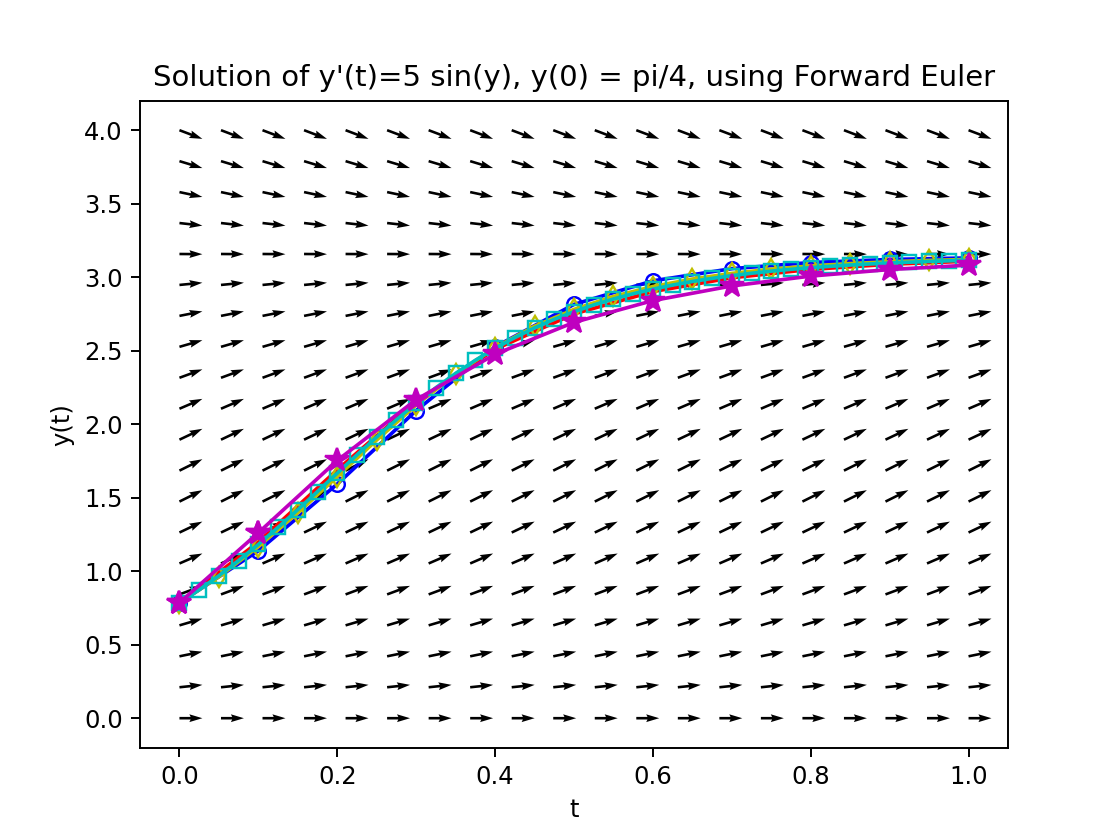

In [13]:
# Next try dt = 0.05 (decreased by a factor of 2)
dt = 0.05

# We will solve for t between 0 and 1 with spacing dt, define t
t = np.arange(0, 1+dt, dt)

# Then predefine the array "y" which will hold our solution.
y = np.zeros(len(t))

# Then setup forward euler with the initial condition, y(0) = pi/4
y[0] = np.pi/4

# And calculate all of the other points in a for loop
for k in range(len(y)-1):
    y[k+1] = y[k] + dt*f(y[k])
    
# Then plot it using open yellow diamonds with lines in between
ax2.plot(t, y, 'yd-', markerfacecolor='none')

# Calculate the error and print it
error = np.abs(y_exact(1) - y[-1])
print("Error at t=1.0, with dt = 0.05, is = ", error)

# And show the figure
fig2

Notice that the error halfed (it went from ~0.22 to ~0.11) as we decreased `dt` by a factor of 2. Let's decrease by another factor of 2 to see if the trend continues.

Redo everything with `dt=0.025`, decreased again by a factor of 2.

Error at t=1.0, with dt = 0.025, is =  0.006108204951685625


<IPython.core.display.Javascript object>


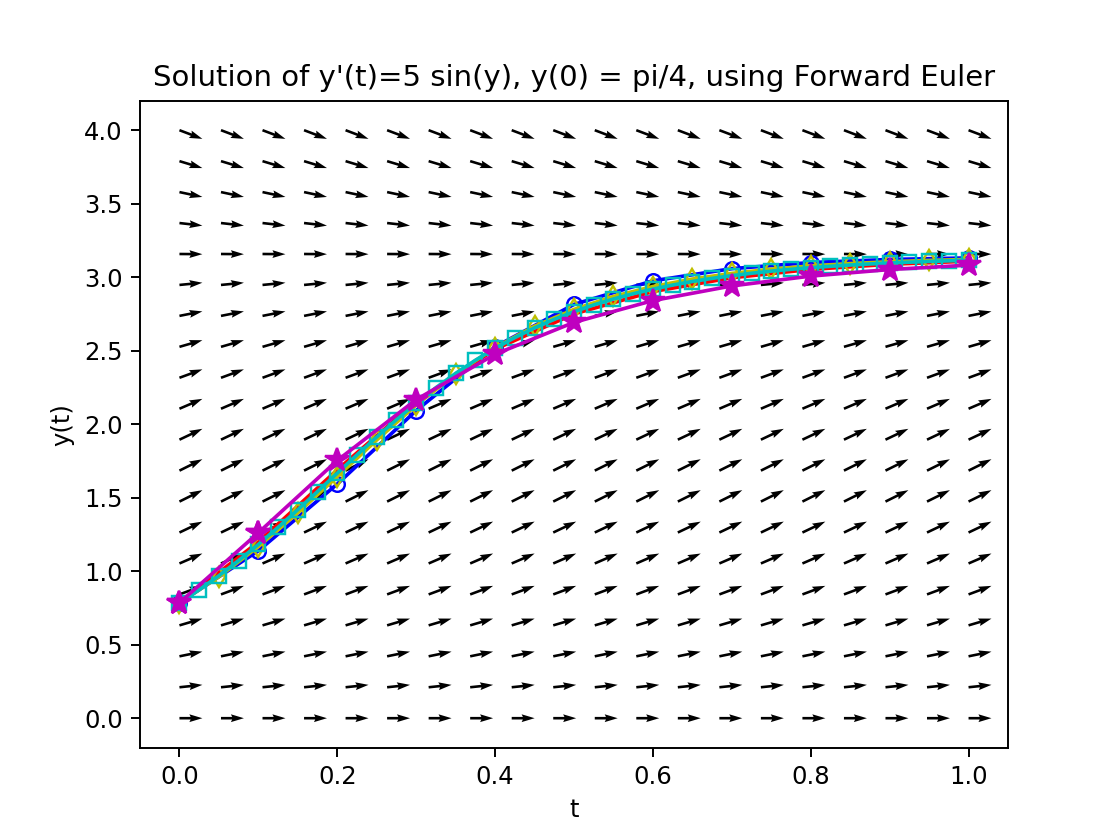

In [14]:
# Next try dt = 0.025 (decreased by a factor of 2)
dt = 0.025

# We will solve for t between 0 and 1 with spacing dt, define t
t = np.arange(0, 1+dt, dt)

# Then predefine the array "y" which will hold our solution.
y = np.zeros(len(t))

# Then setup forward euler with the initial condition, y(0) = pi/4
y[0] = np.pi/4

# And calculate all of the other points in a for loop
for k in range(len(y)-1):
    y[k+1] = y[k] + dt*f(y[k])
    
# Then plot it using open cyan squares with lines in between
ax2.plot(t, y, 'cs-', markerfacecolor='none')

# Calculate the error and print it
error = np.abs(y_exact(1) - y[-1])
print("Error at t=1.0, with dt = 0.025, is = ", error)

# And show the figure
fig2

We see that the error decreased again by a factor of 2. Since decreasing the step size (`dt`) by a factor of 2 decreases the error by a factor of 2, it seems that **the Forward-Euler method has global error $\mathcal{O}(\Delta t)$**. 

To see this, we need to think back to where the error comes from. Remember, the approximation was that
$$ x'(t) \approx \frac{x(t+\Delta t)-x(t)}{\Delta t}.$$
But we **know the error in this approximation:**
$$ x'(t) = \frac{x(t+\Delta t) - x(t)}{\Delta t} + \mathcal{O}(\Delta t),$$
which is first-order accuracy. So we have
$$
f(t_k, x(t_k)) = x'(t_k) = \frac{x(t_k+\Delta t) - x(t_k)}{\Delta t} + \mathcal{O}(\Delta t),
$$
and then multiply through by $\Delta t$ to get
$$
\Delta t f(t_k, x(t_k)) = x(t_{k+1}) - x(t_k) + \mathcal{O}(\Delta t^2),
$$
we have that 
$$ x(t_{k+1}) = x(t_k) + \Delta t f(t_k, x(t_k)) + \mathcal{O}(\Delta t^2).$$
In other words, **if we know exactly what $x(t_k)$ is, then taking one step forward to get $x(t_{k+1})$ results in an $\mathcal{O}(\Delta t^2)$ error.** That is the **local error**. 

**The local (one-step) error for the Forward-Euler method is $\mathcal{O}(\Delta t^2)$**. 

But what we were measuring above is not the *local* error, it is the *global error.* The way we get to *global error* is by noticing that the global error comes from adding up the local error several times. How many times? Exactly $N$ times, where $N = T / \Delta t$ is the number of steps to get from $t=0$ to $t=T$. Therefore the global error is 
$$
\text{Forward Euler Global Error} = N \mathcal{O}(\Delta t^2) = \frac{T}{\Delta t}\mathcal{O}(\Delta t^2) = \mathcal{O}(\Delta t).
$$
In other words **the global error for the Forward-Euler method is $\mathcal{O}(\Delta t)$, or you may say that it is a *first-order accurate method.***

You don't need to know all of these calculations. You just need to know that Forward-Euler has second-order local error and first-order global error. 

## The Backward-Euler method
Now we have said just about all there is to say about Forward Euler, except for stability (we will get to that later). Let's introduce a new method first. 

There is no obvious reason why we had to use a forward difference scheme.  For example, we could just as easily have used the first order backward difference scheme

$x'(t) \approx \frac{x(t) - x(t - \Delta t)}{\Delta t}$.  

This approximation is valid at any time, so in particular it is valid at time $t_1$.  We therefore have 

$x'(t_1) \approx \frac{x(t_1) - x(t_1 - \Delta t)}{\Delta t} = \frac{x(t_1) - x(t_0)}{\Delta t}$.  

If we use this approximation in our differential equation (at time $t_1$), then we get 

$\frac{x(t_1) - x(t_0)}{\Delta t} \approx f(t_1, x(t_1))$.  

We know from the initial condition that $x(t_0) = x_0$.  If we plug this in and do a little simplifying, we get 

$x(t_1) \approx x_0 + \Delta t f(t_1, x(t_1))$.  

Of course, we still don't know what $x(t_1)$ is, but we can use this formula as the definition of our approximation $x_1$: 

$x_1 = x_0 + \Delta t f(t_1, x_1)$.  

This looks almost the same as our formula for the forward Euler method, but there is one very important difference.  **This function is not actually solved for $x_1$ because there is still an $x_1$ on the right hand side.**  We say that this is an *implicit* equation for $x_1$ because we still need to do more work to solve for our next approximation.  In principle, if we know the formula for $f$ (which we always will - it is just the right hand side of our differential equation) then we can solve this equation for $x_1$.  However, it might be very difficult, or even impossible, to solve the equation by hand.  Fortunately, there are many numerical methods (including some builtin python functions) that we can use to solve the equation.  In this lecture, we will just assume that we have solved for $x_1$ and not worry about how to actually do so.  

Just like in the last lecture, we can repeat this process with time $t_2$ instead of $t_1$.  We get the approximation 

$\frac{x(t_2) - x(t_2 - \Delta t)}{\Delta t} \approx f(t_2, x(t_2))$.  

If we simplify this (and use the fact that the $t$'s are evenly spaced) we get 

$x(t_2) \approx x(t_1) + \Delta t f(t_2, x(t_2))$.  

We don't know $x(t_1)$ or $x(t_2)$, but we do already have a good approximation for $x(t_1)$, so we can write 

$x(t_2) \approx x_1 + \Delta t f(t_2, x(t_2))$.  

We will now take this as a definition for the approximation $x_2$, so we have 

$x_2 = x_1 + \Delta t f(t_2, x_2)$.  

Once again, this formula isn't actually solved for $x_2$ yet, but at least in principle we can solve it, so we will assume that we have found $x_2$.  

We can repeat this process indefinitely.  In general, if we already have all the approximations for $x(t)$ up to $x_k$, then we get the formula 

$x_{k+1} = x_k + \Delta t f(t_{k+1}, x_{k+1})$.  

Again, **this is an implicit equation** for $x_{k+1}$.  If the formula for $f$ is relatively simple, then we might be able to find $x_{k+1}$ by hand, but usually we will have to use some python method to approximate the solution.  We call this method for approximating the $x$ values the *backward Euler method*.  It is a time stepping method, because we approximate $x$ at each time and turn and never go back to approximate $x$ at an earlier time again.  We say that the method is *implicit*, because at each step we have to solve an implicit equation for $x_{k+1}$. **This distinction is going to end up being very important.**

Let's implement the backward-Euler method for solving the same problem. This will require more work, so before jumping into a for loop we are going to go step by step.

We are going to solve the same IVP, $y'(t) = 5 \sin(y), ~ y(0) = \pi/4$, with the Backward-Euler method and $\Delta t = 0.1$.

In [15]:
# Define dt = 0.1
dt = 0.1

# Define y0, the initial condition
y0 = np.pi/4

Now we want to find $y_1$. We have $y_1 = y_0 + dt\times f(t_1, y_1) = y_0 + 5dt \sin(y1)$, but we can't solve that explicitly! How can we go about this? Do you remember a time in this class when we used a computer to solve an equation that we could not?

We did this once on the homework for optimization! We need to do *root finding.* In other words, we need to *find* the $y_1$ such that
$$ g(y_1) = y_1 - y_0 - 5 dt \sin(y_1) = 0.$$
The $y_1$ that will do that is the $y_1$ that we want. We do this in python using `scipy.integrate.fsolve`. Let's see how that works.

In [16]:
# First we define an anonymous function for g. 
# Use "z" as your variable (to avoid confusion) and use y0!
g = lambda z: z - y0 - dt*f(z)

# Now we need to find the values of z that solves that equation, and that is y1!
import scipy.optimize
# The syntax for fsolve is 'scipy.optimize.fsolve(anonymous_function, guess)'
# Can you think about what a good guess would be for y1? What about for y2? 
# How can we code this?
y1 = scipy.optimize.fsolve(g, y0) # Use y0 as our guess because we think 
                                  # that y1 is close to y1

Once we have that let's plot our work to verify.

Plot `y0` and `y1` on `ax2` as big magenta stars.

<IPython.core.display.Javascript object>


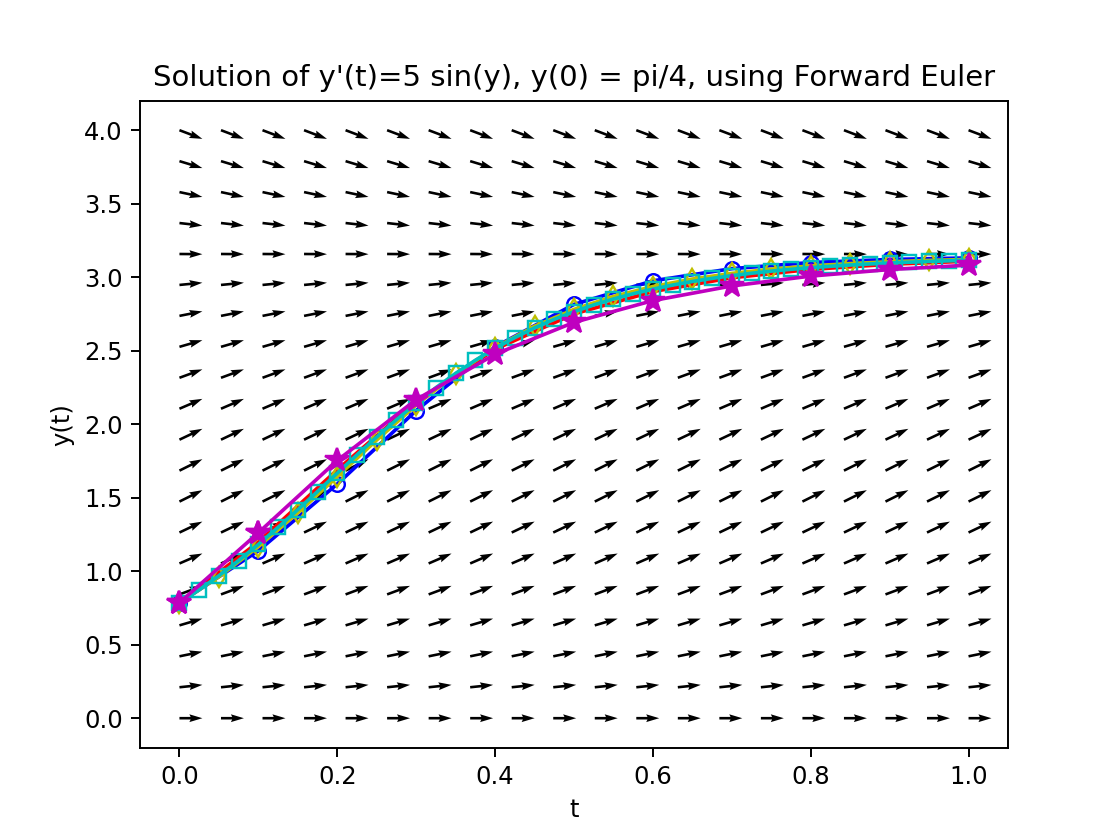

In [17]:
ax2.plot(0, y0, 'm*', markersize=10)
ax2.plot(dt, y1, 'm*', markersize=10)

fig2

Now that this looks like it's working, we can loop and find the rest of them.

Bacwkard-Euler Error at t=1.0, with dt = 0.1, is =  0.027093671223890947


<IPython.core.display.Javascript object>


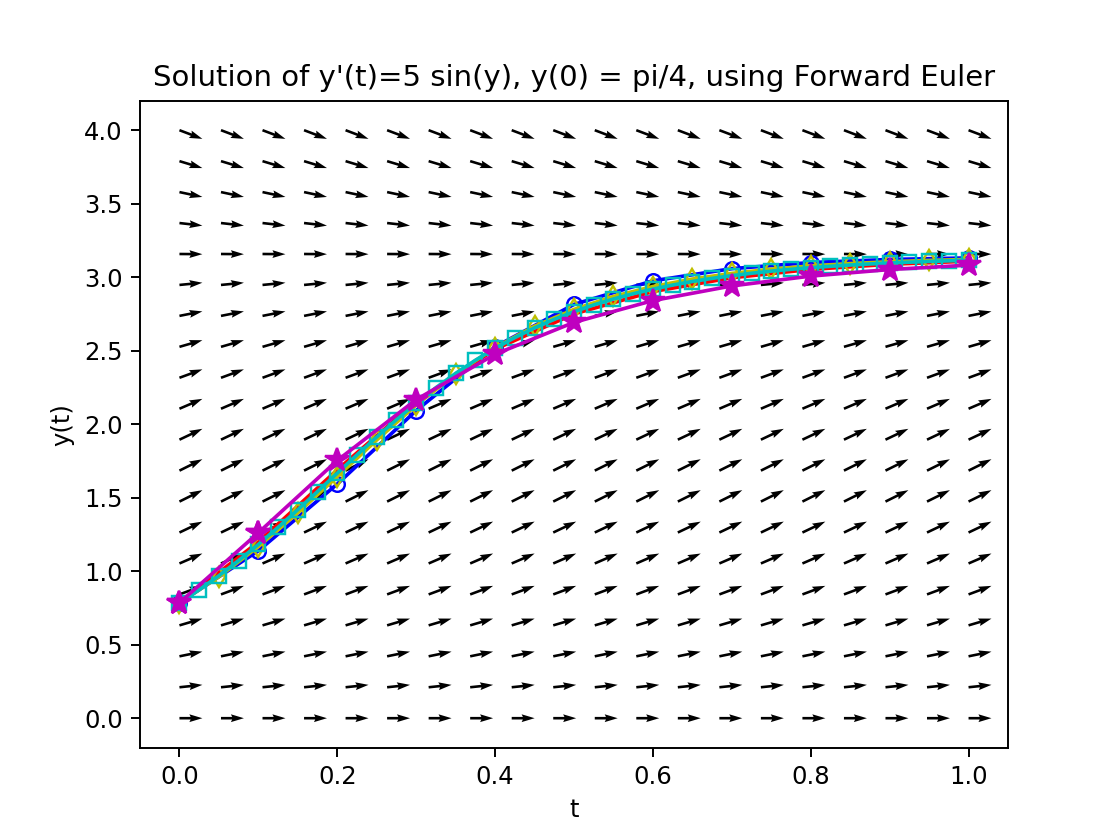

In [18]:
# Define dt
dt = 0.1

# We will solve for t between 0 and 1 with spacing dt, define t
t = np.arange(0, 1+dt, dt)

# Then predefine the array "y" which will hold our solution.
y = np.zeros(len(t))

# Then setup backward euler with the initial condition, y(0) = pi/4
y[0] = np.pi/4

# And calculate all of the other points in a for loop
for k in range(len(y)-1):
    # Setup the equation we need to solve using an anonymous function
    g = lambda z: z - y[k] - dt*f(z)
    y[k+1] = scipy.optimize.fsolve(g, y[k])
    
# Then plot it using big magenta stars with lines in between
ax2.plot(t, y, 'm*-', markersize=10)

# Calculate the error and print it
error = np.abs(y_exact(1) - y[-1])
print("Bacwkard-Euler Error at t=1.0, with dt = 0.1, is = ", error)

# And show the figure
fig2

Nice, this looks great! Based on our analysis of global error for the Forward-Euler method, we can guess that the error for the Backward-Euler method will be the same. We can verify by running this again using `dt = 0.01` (decrease by a factor of 10). We won't plot it, just calculate the error.

In [19]:
# Define dt
dt = 0.01

# We will solve for t between 0 and 1 with spacing dt, define t
t = np.arange(0, 1+dt, dt)

# Then predefine the array "y" which will hold our solution.
y = np.zeros(len(t))

# Then setup backward euler with the initial condition, y(0) = pi/4
y[0] = np.pi/4

# And calculate all of the other points in a for loop
for k in range(len(y)-1):
    # Setup the equation we need to solve using an anonymous function
    g = lambda z: z - y[k] - dt*f(z)
    y[k+1] = scipy.optimize.fsolve(g, y[k])

# Calculate the error and print it
error = np.abs(y_exact(1) - y[-1])
print("Bacwkard-Euler Error at t=1.0, with dt = 0.01, is = ", error)

Bacwkard-Euler Error at t=1.0, with dt = 0.01, is =  0.0025263567772535467


We can see that decreasing `dt` by a factor of 10 decreased the error by a factor of 10 as well. Indeed, **the global error for the Backward-Euler method is $\mathcal{O}(\Delta t)$**, just like for Forward-Euler. 

We'll do more comparison and introduce some new methods next time!